In [1]:
%reset -f

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gensim import corpora
from gensim.models.phrases import Phrases, Phraser
from gensim.models import TfidfModel

data_path = '/Users/ayemyatwinshwe/repos/data/trading_data/'

In [3]:
df_tokens = pd.read_parquet(data_path + 'earning_call_tokens')
df_tokens.head()

,tokens
0,"[operator, good, day, ladies, gentlemen, welco..."
1,"[operator, good, day, ladies, gentlemen, welco..."
2,"[operator, good, afternoon, welcome, agilent, ..."
3,"[operator, good, afternoon, welcome, agilent, ..."
4,"[operator, good, afternoon, welcome, agilent, ..."


In [4]:
data_tokens = df_tokens['tokens'].to_list()

In [5]:
# bigrams and trigrams
bigrams_phrases = Phrases(data_tokens, 
                          min_count= 25, 
                          threshold = 1)
            
trigrams_phrases = Phrases(bigrams_phrases[data_tokens], 
                           min_count= 25, 
                           threshold = 1)

bigram = Phraser(bigrams_phrases)
trigram = Phraser(trigrams_phrases)

data_bigrams = [bigram[doc] for doc in data_tokens]
data_trigrams = [trigram[bigram[doc]] for doc in data_bigrams]

In [6]:
data_trigrams[0][:20]

['operator_good_day_ladies',
 'gentlemen_welcome',
 'agilent',
 'technologies_quarter_earnings',
 'conference_time',
 'lines_listen',
 'mode_later_conduct_question',
 'answer_session_instructions_provided',
 'time_operator_instructions',
 'reminder_today_conference_recorded',
 'hand_conference',
 'ankur_dhingra',
 'vice_president_investor_relations',
 'ahead',
 'ankur_dhingra',
 'thank_welcome',
 'agilent',
 'quarter_conference',
 'fiscal_year',
 'mike_mcmullen']

In [7]:
dictionary = corpora.Dictionary(data_trigrams)
corpus = [dictionary.doc2bow(doc) for doc in data_trigrams]
tfidf = TfidfModel(corpus, dictionary)
len(tfidf[corpus])

26237

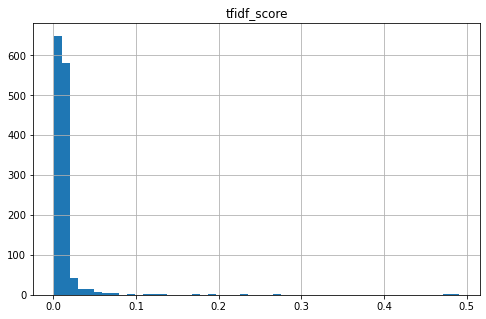

In [8]:
randint = np.random.randint(0, 26237, size=None)
test = tfidf[corpus][randint]
tfidf_scores = pd.DataFrame([tup[1] for tup in test])
tfidf_scores.columns = ['tfidf_score']

tfidf_scores.hist(bins=50, figsize=(8,5));